In [5]:
import numpy as np
import matplotlib.pyplot as plt


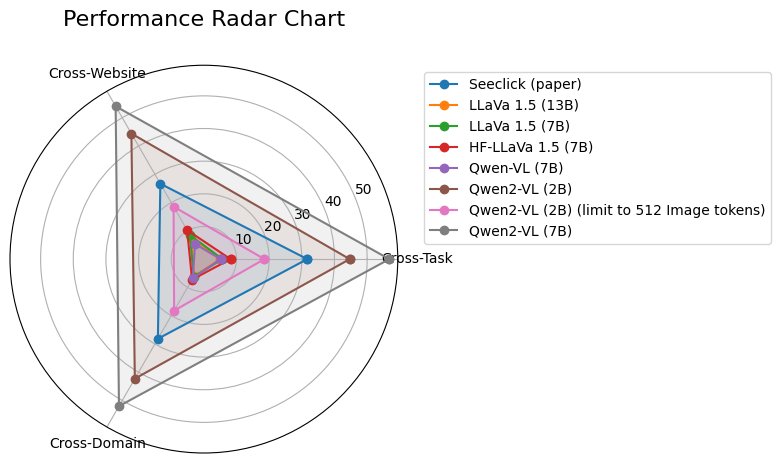

In [10]:
# Data: keys are model names and values are lists of percentages for three metrics.
data = {
    "Seeclick (paper)": [31.67, 26.67, 28.17],
    "LLaVa 1.5 (13B)": [5.06, 7.61, 6.14],
    "LLaVa 1.5 (7B)": [5.68, 8.48, 6.25],
    "HF-LLaVa 1.5 (7B)": [8.17, 10.25, 7.24],
    "Qwen-VL (7B)": [5.10, 5.39, 6.80],
    "Qwen2-VL (2B)": [44.67, 44.41, 42.29],
    "Qwen2-VL (2B) (limit to 512 Image tokens)": [18.55, 18.58, 18.23],
    "Qwen2-VL (7B)": [56.79, 54.04, 52.01]
}

# Define the categories (metrics) for the radar chart.
categories = ["Cross-Task", "Cross-Website", "Cross-Domain"]
num_vars = len(categories)

# Compute the angles for each axis, and add the first angle at the end to close the circle.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

# Create the radar chart.
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model's data on the radar chart.
for model, values in data.items():
    stats = np.array(values)
    stats = np.concatenate((stats, [stats[0]]))  # Close the loop
    ax.plot(angles, stats, marker='o', label=model)
    ax.fill(angles, stats, alpha=0.1)

# Set the labels for each axis.
ax.set_thetagrids(angles[:-1] * 180/np.pi, categories)
ax.set_title("Performance Radar Chart", size=16, y=1.08)

# Add a legend outside the plot area.
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))

plt.tight_layout()
plt.show()